In [306]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [307]:
df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")

In [308]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [309]:
# Change column names
df = df.rename(columns={'productTitle': 'ProductTitle', 'originalPrice': 'OriginalPrice', 'price': 'SellingPrice', 'sold': 'UnitsSold', 'tagText': 'TagText'})

In [310]:
df.isnull().sum()

ProductTitle        0
OriginalPrice    1513
SellingPrice        0
UnitsSold           0
TagText             3
dtype: int64

In [311]:
# Dropping OriginalPrice column 
df=df.drop(['OriginalPrice'], axis=1)

In [312]:
# change null values to 0
df.fillna(0, inplace=True)

In [313]:
# In TagText column rename rows of Free shipping with Free Shipping 
df.loc[df['TagText'] == 'Free shipping', 'TagText'] = 'Free Shipping'

In [314]:
# Products where free shipping is 0 , change the 0 with Free Shipping
df.loc[df['TagText'] == 0, 'TagText'] = 'Free Shipping'

In [315]:
# Remove '$' and ',' symbols from 'SellingPrice' and 'OriginalPrice' columns
df['SellingPrice'] = df['SellingPrice'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Convert 'SellingPrice' and 'OriginalPrice' to numeric
df['SellingPrice'] = pd.to_numeric(df['SellingPrice'])

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductTitle  2000 non-null   object 
 1   SellingPrice  2000 non-null   float64
 2   UnitsSold     2000 non-null   int64  
 3   TagText       2000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 62.6+ KB


In [317]:
df.describe()

,SellingPrice,UnitsSold
count,2000.000000,2000.000000
mean,156.560020,23.493500
std,176.936735,254.094061
min,0.990000,0.000000
25%,48.530000,1.000000
50%,114.080000,3.000000
75%,193.490000,9.000000
max,2876.380000,10000.000000


In [318]:
df.shape

(2000, 4)

In [319]:
# Add new column TotalCost = sellingprice*unitsSold
df['TotalCost'] = df['SellingPrice'] * df['UnitsSold']

In [320]:
# Most expensive product in stock
df[df['SellingPrice'] == df['SellingPrice'].max()]

,ProductTitle,SellingPrice,UnitsSold,TagText,TotalCost
656,"Luxury Modern Tight Curved Back Velvet Sofa,Mi...",2876.38,0,Free Shipping,0.0


In [321]:
# Most expensive product sold
df[df['TotalCost'] == df['TotalCost'].max()]

,ProductTitle,SellingPrice,UnitsSold,TagText,TotalCost
1008,Portable round Folding Chair Accordion Chair H...,12.28,10000,Free Shipping,122800.0


In [322]:
# Least priced products list
df[df['SellingPrice'] == df['SellingPrice'].min()]

,ProductTitle,SellingPrice,UnitsSold,TagText,TotalCost
597,1PC Mini House Night Table Model Wooden Mini B...,0.99,7,Free Shipping,6.93
958,Portable Wardrobe Closet Heavy Duty Hanger Fre...,0.99,2,Free Shipping,1.98
1095,New Wholesale Simple Shoe Rack Multi-layer Spa...,0.99,43,Free Shipping,42.57
1373,1 folding chair for home and outdoor use Conve...,0.99,85,Free Shipping,84.15
1498,"Office Desk Mat,Non-Slip PU Leather Desk Blott...",0.99,32,Free Shipping,31.68
1567,1pc Sequin Inflatable Sofa Colorfull Sequin La...,0.99,26,Free Shipping,25.74
1583,Card Folding Stool Portable Outdoor Camping an...,0.99,41,Free Shipping,40.59
1586,1/12 Scale mini house Miniature Round Wooden C...,0.99,23,Free Shipping,22.77


In [323]:
# Replace non-numeric strings with '0' before extracting shipping charges
df['ShippingCharges'] = df['TagText'].astype(str).str.replace('Free Shipping', '0', regex=False)

# Remove '+Shipping: $' and ',' symbol from 'ShippingCharges' column
df['ShippingCharges'] = df['ShippingCharges'].str.replace('+Shipping: $', '', regex=False).str.replace(',', '', regex=False)

# Convert 'TotalCost_with_Shipping' to numeric
df['ShippingCharges'] = pd.to_numeric(df['ShippingCharges'])

# Desired order of columns
desired_column_order = ['ProductTitle', 'SellingPrice', 'UnitsSold', 'TagText', 'ShippingCharges', 'TotalCost']

# Reindex the DataFrame with the desired column order
df = df[desired_column_order]

In [324]:
# Create a new column 'TotalCost_with_Shipping'
# In the new column 'TotalCost_with_Shipping' = ShippingCharges+TotalCost , only when TagText is not free shipping and TotalCost is not 0
df['TotalCost_with_Shipping'] = np.where((df['TagText'] != 'Free Shipping') & (df['TotalCost'] != 0), df['ShippingCharges'] + df['TotalCost'], 0)

In [325]:
# Top 10 products
top_10_products = df.sort_values(by = 'UnitsSold', ascending = False).head(10)
top_10_products

,ProductTitle,SellingPrice,UnitsSold,TagText,ShippingCharges,TotalCost,TotalCost_with_Shipping
1008,Portable round Folding Chair Accordion Chair H...,12.28,10000,Free Shipping,0.0,122800.0,0.0
1391,MUMUCC Multifunctional Foldable And Adjustable...,21.94,3000,Free Shipping,0.0,65820.0,0.0
696,MUMUCC Multifunctional Foldable And Adjustable...,26.11,3000,Free Shipping,0.0,78330.0,0.0
1021,Stylish Shoe Rack Metal Simple Shoe Shelf Foot...,13.64,2000,Free Shipping,0.0,27280.0,0.0
1174,Portability Foot Rest Under Desk Footrest Ergo...,8.04,1000,Free Shipping,0.0,8040.0,0.0
22,Office Furniture Computer Stand 42*26cm Adjust...,26.03,1000,Free Shipping,0.0,26030.0,0.0
1016,"Monitor Stand for 13-32 inches Screens, Dual M...",66.68,900,Free Shipping,0.0,60012.0,0.0
693,Portability Foot Rest Under Desk Footrest Ergo...,5.00,900,Free Shipping,0.0,4500.0,0.0
1511,Portable Folding Telescopic Stool Lightweight ...,11.20,900,Free Shipping,0.0,10080.0,0.0
494,Shoe-shelf Shoerack Multilayer Shoe Rack Shoeb...,15.40,700,Free Shipping,0.0,10780.0,0.0


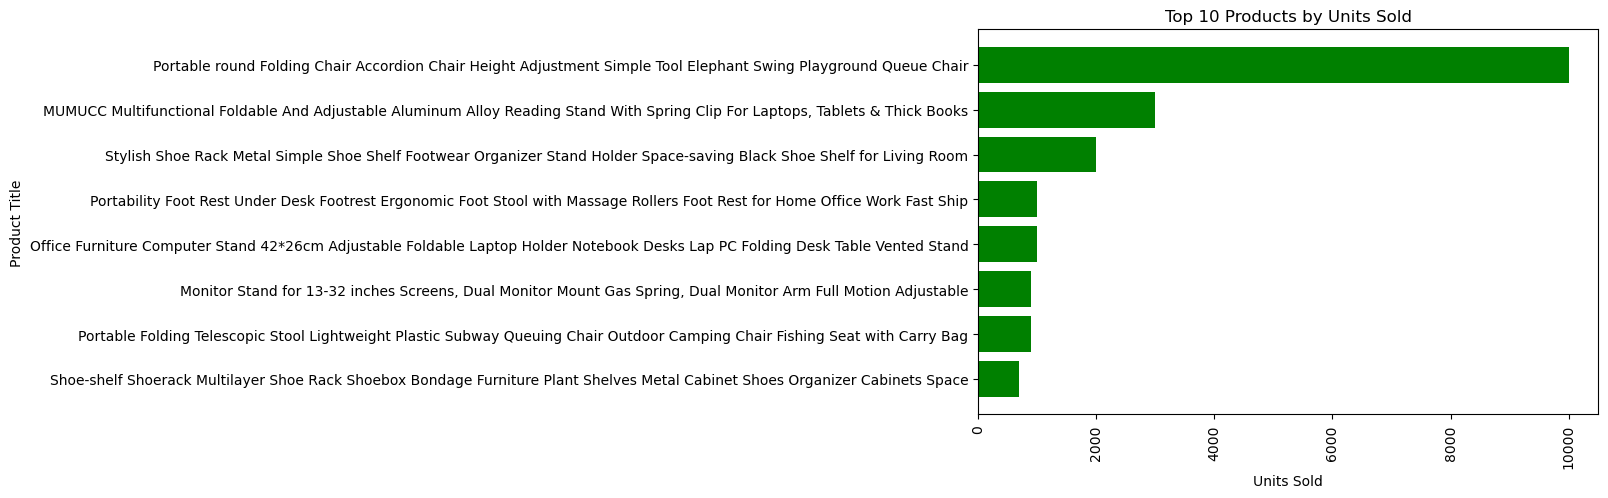

In [326]:
# Plot a bar chart to visualize the distribution
plt.figure(figsize=(8, 5))
plt.barh(top_10_products['ProductTitle'], top_10_products['UnitsSold'], color='green')
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.title('Top 10 Products by Units Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [327]:
# Filtering the products within the budget of minimum $80 to maximum $500
affordable_products = df[(df['SellingPrice'] >= 80) & (df['SellingPrice'] <= 500)]
affordable_products

,ProductTitle,SellingPrice,UnitsSold,TagText,ShippingCharges,TotalCost,TotalCost_with_Shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free Shipping,0.0,0.00,0.0
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free Shipping,0.0,0.00,0.0
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",123.40,53,Free Shipping,0.0,6540.20,0.0
6,5-Piece Patio Furniture Set Outdoor Couch with...,198.31,1,Free Shipping,0.0,198.31,0.0
9,Outdoor Furniture Set 3 Pieces Wicker Patio Fu...,233.30,0,Free Shipping,0.0,0.00,0.0
...,...,...,...,...,...,...,...
1994,Garden Furniture 4507 (Dark Grey) Steel Frame ...,105.16,2,Free Shipping,0.0,210.32,0.0
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",276.65,2,Free Shipping,0.0,553.30,0.0
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",196.44,10,Free Shipping,0.0,1964.40,0.0
1998,Furniture Acrylic Coffee Table Transparent Liv...,228.18,0,Free Shipping,0.0,0.00,0.0


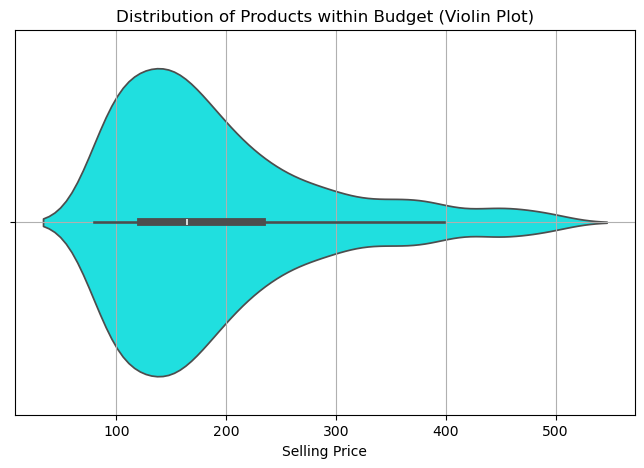

In [328]:
# Distribution of the products within the budget of minimum $80 and maximum $500 using a violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x=affordable_products['SellingPrice'], color='cyan')
plt.xlabel('Selling Price')
plt.title('Distribution of Products within Budget (Violin Plot)')
plt.grid(True)
plt.show()

In [329]:
# Affordable products by the number of units sold in descending order
top_products = affordable_products.sort_values(by='UnitsSold', ascending = False).head(5)
top_products

,ProductTitle,SellingPrice,UnitsSold,TagText,ShippingCharges,TotalCost,TotalCost_with_Shipping
863,Caterpillar Single Sofa Lazy Couch Tatami Livi...,233.46,405,+Shipping: $109.18,109.18,94551.30,94660.48
1281,Electric Stand Up Desk Workstation Whole-Piece...,152.70,354,Free Shipping,0.00,54055.80,0.00
1143,Nordic Ins Net Red Bedside Table Modern Minima...,104.85,185,Free Shipping,0.00,19397.25,0.00
1823,New Foldable Multi-layer Wardrobe Household Du...,103.46,133,Free Shipping,0.00,13760.18,0.00
1181,Luxury Living Room Sofa Furgle Chair Soft Sued...,236.87,84,Free Shipping,0.00,19897.08,0.00


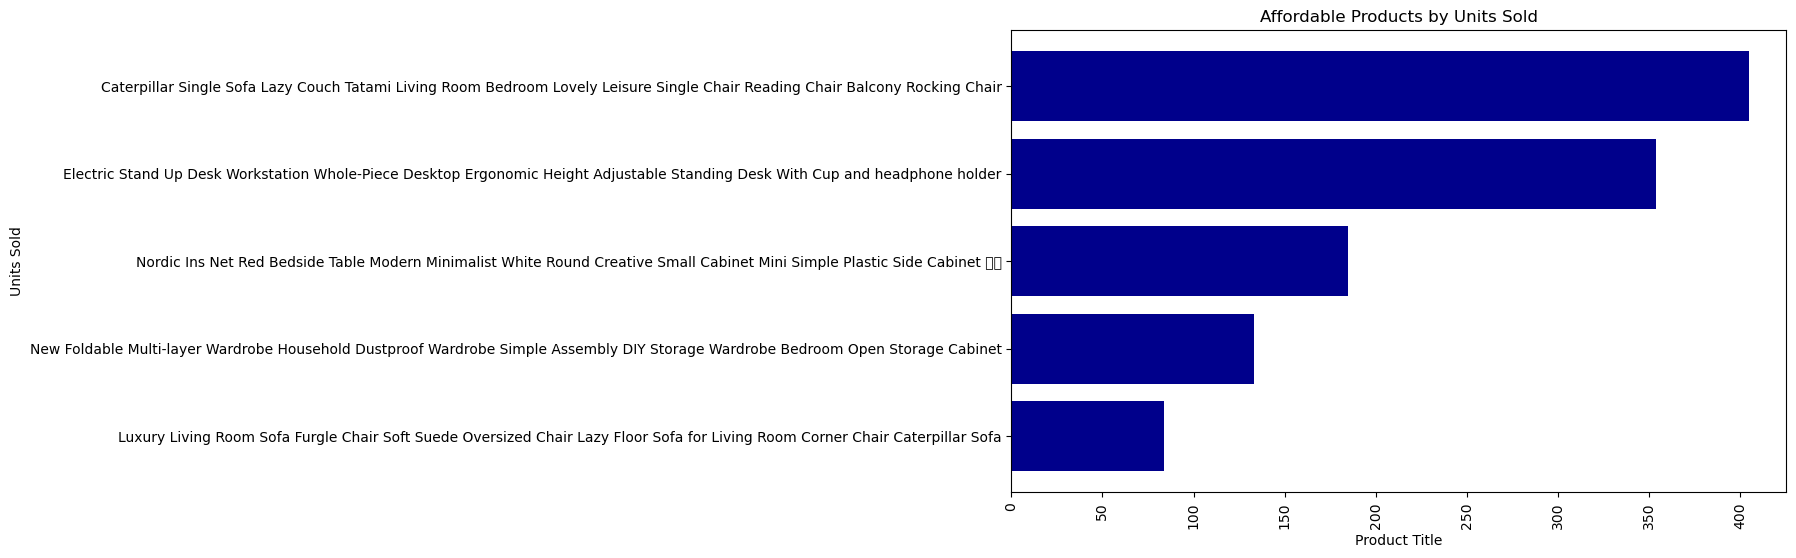

In [330]:
# Distribution of Affordable products by the number of units sold in descending order
plt.figure(figsize=(10, 6))
plt.barh(top_products['ProductTitle'], top_products['UnitsSold'], color='darkblue')
plt.xlabel('Product Title')
plt.ylabel('Units Sold')
plt.title('Affordable Products by Units Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()